In [66]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
import numpy as np
import matplotlib.pyplot as plt
from colorcet import glasbey_dark as glasbey
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test_descriptions.csv")

In [4]:
encoder = SentenceTransformer("stsb-roberta-large", device="cuda")

In [5]:
def encode_data(df, encoder):
    with torch.no_grad():
        encoded = encoder.encode(df["description"].tolist(), show_progress_bar=True, device="cuda")
    df["desc_encoded"] = encoded.tolist()
    return df

In [6]:
train = encode_data(train, encoder)

Batches:   0%|          | 0/1051 [00:00<?, ?it/s]

In [7]:
import pickle

with open("train_encoded.pkl", "wb") as f:
    pickle.dump(train, f)

In [8]:
import sentence_transformers as sbert

In [24]:
encoded = encoder.encode(train["description"].tolist(), show_progress_bar=True, device="cuda")

Batches:   0%|          | 0/1051 [00:00<?, ?it/s]

In [15]:
train["desc_encoded"].values[0]

[0.31738799810409546,
 -0.6327198147773743,
 -0.47486305236816406,
 1.06899893283844,
 1.1308178901672363,
 -0.7074066996574402,
 -0.2604835629463196,
 -0.29956933856010437,
 0.39222201704978943,
 0.7102316617965698,
 -0.7425652742385864,
 -0.23101763427257538,
 -0.40896040201187134,
 2.80423641204834,
 -1.4093743562698364,
 0.6148871183395386,
 -0.13148215413093567,
 1.3150720596313477,
 -1.1133368015289307,
 -0.9148734211921692,
 0.5981881022453308,
 -0.56707763671875,
 -0.20194540917873383,
 0.4945946931838989,
 -0.3339902460575104,
 -0.3343404233455658,
 0.1120685264468193,
 0.27172213792800903,
 -0.06635225564241409,
 -0.8646652698516846,
 -0.5440243482589722,
 0.8130324482917786,
 0.1110939085483551,
 0.48956143856048584,
 -0.2712255120277405,
 1.0540827512741089,
 1.2252880334854126,
 -0.9748314619064331,
 -0.34493163228034973,
 0.4390413463115692,
 0.325395405292511,
 -0.14919552206993103,
 -0.011518358252942562,
 0.1738869994878769,
 -1.0470304489135742,
 -0.04834170266985893,

In [21]:
np.asarray(train["desc_encoded"].values)

array([list([0.31738799810409546, -0.6327198147773743, -0.47486305236816406, 1.06899893283844, 1.1308178901672363, -0.7074066996574402, -0.2604835629463196, -0.29956933856010437, 0.39222201704978943, 0.7102316617965698, -0.7425652742385864, -0.23101763427257538, -0.40896040201187134, 2.80423641204834, -1.4093743562698364, 0.6148871183395386, -0.13148215413093567, 1.3150720596313477, -1.1133368015289307, -0.9148734211921692, 0.5981881022453308, -0.56707763671875, -0.20194540917873383, 0.4945946931838989, -0.3339902460575104, -0.3343404233455658, 0.1120685264468193, 0.27172213792800903, -0.06635225564241409, -0.8646652698516846, -0.5440243482589722, 0.8130324482917786, 0.1110939085483551, 0.48956143856048584, -0.2712255120277405, 1.0540827512741089, 1.2252880334854126, -0.9748314619064331, -0.34493163228034973, 0.4390413463115692, 0.325395405292511, -0.14919552206993103, -0.011518358252942562, 0.1738869994878769, -1.0470304489135742, -0.04834170266985893, -0.47567856311798096, 0.93462973

In [48]:
kmeans = KMeans(n_clusters=5)

In [49]:
kmeans.fit(encoded)

KMeans(n_clusters=5)

In [50]:
cluster_assignment = kmeans.labels_

In [51]:
cluster_assignment

array([0, 1, 2, ..., 4, 4, 4], dtype=int32)

In [52]:
train["cluster"] = cluster_assignment

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


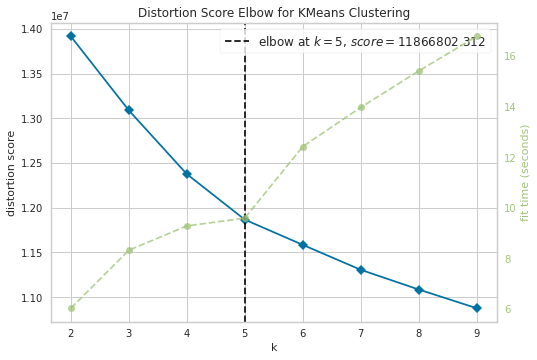

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeans, k=(2,10), timings= True)
visualizer.fit(encoded)        # Fit data to visualizer
visualizer.show()   

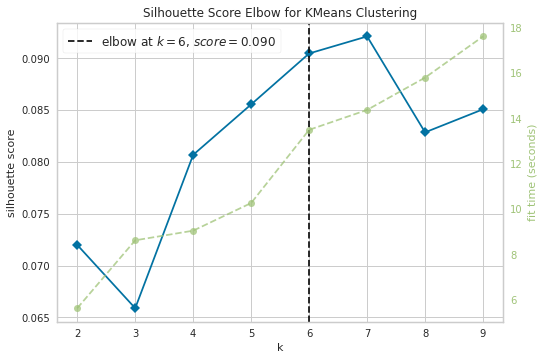

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
visualizer = KElbowVisualizer(kmeans, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(encoded)        # Fit the data to the visualizer
visualizer.show()

/home/alejandro.vaca/miniconda/envs/spainai_hackaton/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/alejandro.vaca/miniconda/envs/spainai_hackaton/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/alejandro.vaca/miniconda/envs/spainai_hackaton/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


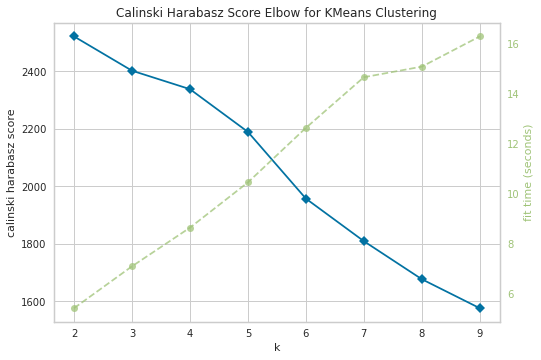

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [32]:
visualizer = KElbowVisualizer(kmeans, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(encoded)        # Fit the data to the visualizer
visualizer.show()

In [37]:
import umap

ModuleNotFoundError: No module named 'umap'

In [36]:
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(encoded)

ModuleNotFoundError: No module named 'umap'

In [53]:
pca = PCA(n_components=2)

In [54]:
encoded_transformed = pca.fit_transform(encoded)

In [55]:
encoded_transformed.shape

(33613, 2)

In [56]:
LABEL_COLOR_MAP = {cluster:color for cluster, color in zip(np.unique(cluster_assignment), glasbey)}

In [57]:
LABEL_COLOR_MAP

{0: '#d60000', 1: '#8c3bff', 2: '#018700', 3: '#00acc6', 4: '#e6a500'}

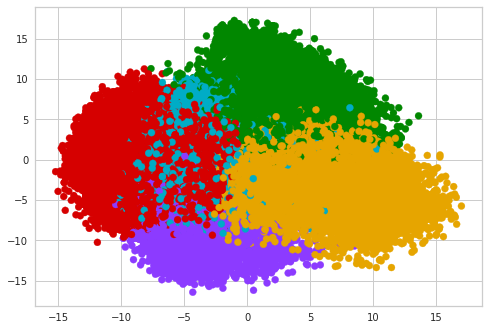

In [58]:
label_color = [LABEL_COLOR_MAP[l] for l in train["cluster"]]
plt.scatter(encoded_transformed[:, 0], encoded_transformed[:, 1], c=label_color)

In [61]:
train.groupby(by="cluster").head()

,name,description,desc_encoded,cluster
0,CROPPED JACKET TRF,Jacket made of a technical fabric with texture...,"[0.31738799810409546, -0.6327198147773743, -0....",0
1,OVERSIZED SHIRT WITH POCKET TRF,Oversized long sleeve shirt with a round colla...,"[0.8411161303520203, -0.15219680964946747, -0....",1
2,TECHNICAL TROUSERS TRF,High-waist trousers with a matching elastic wa...,"[-0.7757552266120911, 0.04527648165822029, -0....",2
3,SHIRT DRESS,Collared dress featuring sleeves falling below...,"[-0.9024309515953064, -0.035094015300273895, -...",0
4,PUFF SLEEVE DRESS WITH PLEATS TRF,Loose-fitting midi dress with a round neckline...,"[0.264337420463562, -0.1002248227596283, -0.46...",1
5,FLORAL PRINT DRESS TRF,Midi dress with a round neckline and short sle...,"[0.11606216430664062, -0.5129053592681885, -0....",1
6,PRINTED DRESS TRF,Midi dress with a shirt collar and sleeves fal...,"[0.15888459980487823, -0.7458779811859131, -0....",1
7,PRINTED MIDI DRESS TRF,Dress with a round neck and long sleeves. Feat...,"[0.2757718563079834, -0.19892758131027222, -0....",1
9,RUFFLED PRINTED DRESS TRF,Short dress featuring a round neckline and lon...,"[0.2582654356956482, -0.5758944153785706, -0.8...",3
10,DRESS WITH POCKETS,Short dress with a shirt collar. Long sleeves ...,"[-0.4718029201030731, -0.44351208209991455, -0...",0


In [65]:
[name for name in train["name"] if "©" in name]

['MICKEY MOUSE ©DISNEY CARDIGAN TRF',
 'MICKEY MOUSE ©DISNEY STRIPED SWEATER',
 'MICKEY & MINNIE MOUSE ©DISNEY OVERSIZED SWEATER',
 'TOY STORY ©DISNEY/PIXAR CARDIGAN',
 'MINNIE MOUSE ©DISNEY SEQUINNED SWEATER TRF',
 'OVERSIZE STAR WARS™ © DISNEY KNIT SWEATER',
 'MICKEY MOUSE ©DISNEY CARDIGAN TRF',
 'MICKEY MOUSE ©DISNEY CROCHET SWEATER TRF',
 'MICKEY MOUSE ©DISNEY SWEATER',
 'POPEYE © KING FEATURES SYNDICATE SWEATER',
 '© DISNEY LEGGINGS',
 'CAPTAIN AMERICA © MARVEL TROUSERS',
 'SPIDER-MAN © MARVEL TROUSERS',
 'WONDER WOMAN © DC COMICS SWEATSHIRT',
 'TOM & JERRY ©WARNER BROS. INC. SWEATSHIRT',
 'MINNIE MOUSE ©DISNEY T-SHIRT',
 'WONDER WOMAN © DC COMICS T-SHIRT',
 'ELMO © SESAME STREET T-SHIRT',
 'DUMBO © DISNEY SWEATSHIRT',
 'BAMBI ©DISNEY DRESS',
 'A CLOCKWORK ORANGE © &™ WARNER BROS. T-SHIRT',
 'EMBROIDERED MICKEY AND MINNIE © DISNEY SWEATSHIRT',
 'MINNIE AND MICKEY MOUSE ©DISNEY SWEATSHIRT TRF',
 'DISNEY© PRINT DRESS TRF',
 'MICKEY MOUSE ©DISNEY T-SHIRT TRF',
 'MINNIE AND MICKEY MOU

In [98]:
def clean_text(text):
    text = text.replace("<br/>", "")
    text = text.replace("<br>", "")
    text = text.replace("\xa0", "")
    text = text.replace("•", "")
    text = text.replace("&#39;", "'")
    text = text.replace(" +", " ")
    text = text.replace("\n", "")
    clean_exprs = ["HEIGHT OF MODEL", "height of model", "model height", "MODEL HEIGHT", "Contains: "]
    for expr in clean_exprs:
        if expr in text:
            text = text[:text.find(expr)]
    return text

In [99]:
def clean_name(name):
    name = name.replace("\xa0", "")
    return name

In [100]:
def preprocess_data(df):
    df["description"] = df["description"].apply(clean_text)
    df["name"] = df["name"].apply(clean_name)
    return df

In [101]:
def get_embeddings(texts, encoder):
    with torch.no_grad():
        return encoder.encode(texts, show_progress_bar=True, device="cuda")

In [102]:
def fit_cluster_model(embeddings, nclusters=5):
    #encoded = get_embeddings(df["description"].tolist(), encoder)
    cluster_model = KMeans(n_clusters=nclusters)
    cluster_model.fit(encoded)
    return cluster_model
    

In [103]:
def apply_cluster_model(encoded_texts, cluster_model):
    return cluster_model.predict(encoded_texts)

In [104]:
def save_one_file(file, df, column):
    with open(file, "w") as f:
        #writer = csv.writer(f)
        for text in df[column]:
            #writer.writerow([text.replace("\n", "")])
            f.write(f"{text}\n")

In [105]:
def save_data(train, val, datadir="data"):
    save_one_file(f"{datadir}/train.source", train, "description")
    save_one_file(f"{datadir}/train.target", train, "name")
    save_one_file(f"{datadir}/val.source", val, "description")
    save_one_file(f"{datadir}/val.target", val, "name")

In [109]:
def save_pickle(file, filename):
    with open(f"{filename}.pkl", "wb") as f:
        pickle.dump(file, f)

In [114]:
def create_data_for_clusters(df, encoder, embeddings_train=None):
    os.makedirs("cluster_data", exist_ok=True)
    df = preprocess_data(df)
    zara_data = pd.read_csv("zara_total5.csv")
    zara_data = preprocess_data(zara_data)
    print("Getting embeddings for train")
    if embeddings_train is None:
        embeddings_train = get_embeddings(df["description"].tolist(), encoder)
    print("Fitting cluster model")
    cluster_model = fit_cluster_model(embeddings_train)
    save_pickle(cluster_model, "kmeans")
    print("Applying cluster model to train")
    df["cluster"] = apply_cluster_model(embeddings_train, cluster_model)
    print("Getting embeddings for zara")
    embeddings_zara = get_embeddings(zara_data["description"].tolist(), encoder)
    print("Applying cluster to zara")
    zara_data["cluster"] = apply_cluster_model(embeddings_zara, cluster_model)
    clusters_names = df["cluster"].unique()
    for cl_name in tqdm(clusters_names, desc="Iterating over clusters"):
        df_cluster = df[df["cluster"]==cl_name]
        train_cl, val_cl = train_test_split(df_cluster, test_size=0.1)
        train_cl = pd.concat([train_cl, val_cl[val_cl["name"].isin(train_cl["name"])]])
        val_cl = val_cl[~val_cl["name"].isin(train_cl["name"])]
        zara_cluster = zara_data[zara_data["cluster"] == cl_name]
        train_cl = pd.concat([train_cl, zara_cluster])
        train_cl.drop_duplicates(["name", "description"], inplace=True)
        foldername = f"cluster_data/cluster_{cl_name}"
        os.makedirs(foldername, exist_ok=True)
        save_data(train_cl, val_cl, datadir=foldername)
        

In [115]:
create_data_for_clusters(train, encoder, encoded)

Getting embeddings for train
Fitting cluster model
Applying cluster model to train
Getting embeddings for zara


Batches:   0%|          | 0/153 [00:00<?, ?it/s]

Iterating over clusters: 100%|██████████| 5/5 [00:00<00:00, 51.51it/s]

Applying cluster to zara


In [118]:
#os.makedirs("cluster_models")

In [76]:
test_encoded = get_embeddings(test["description"].tolist(), encoder)

Batches:   0%|          | 0/46 [00:00<?, ?it/s]

In [83]:
test["cluster"] = apply_cluster_model(test_encoded, kmeans)

In [84]:
encoded_pca_test = pca.transform(test_encoded)

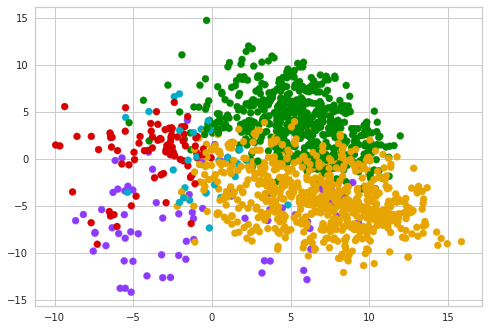

In [85]:
label_color = [LABEL_COLOR_MAP[l] for l in test["cluster"]]
plt.scatter(encoded_pca_test[:, 0], encoded_pca_test[:, 1], c=label_color)

In [89]:
train.groupby(by="cluster")["name"].count() / train.shape[0]

cluster
0    0.225627
1    0.120549
2    0.232440
3    0.193229
4    0.228156
Name: name, dtype: float64

In [90]:
test.groupby(by="cluster")["description"].count() / test.shape[0]

cluster
0    0.060375
1    0.057599
2    0.390007
3    0.022901
4    0.469119
Name: description, dtype: float64